In [78]:
import os 
import pandas as pd

os.chdir("../pydata")
df = pd.read_csv("cancer.csv")

print(df.head())
print(df.shape)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         18.0          10.4           123.0     1000.0           0.1180   
1         20.6          17.8           133.0     1330.0           0.0847   
2         19.7          21.3           130.0     1200.0           0.1100   
3         11.4          20.4            77.6      386.0           0.1420   
4         20.3          14.3           135.0     1300.0           0.1000   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.2780          0.3000               0.1470          0.242   
1            0.0786          0.0869               0.0702          0.181   
2            0.1600          0.1970               0.1280          0.207   
3            0.2840          0.2410               0.1050          0.260   
4            0.1330          0.1980               0.1040          0.181   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [93]:
X = df.iloc[:,0:30]
y = df.iloc[:,30]

print(X.head())
print(y.head())

print("********")

print(X.shape)
print(y.shape)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         18.0          10.4           123.0     1000.0           0.1180   
1         20.6          17.8           133.0     1330.0           0.0847   
2         19.7          21.3           130.0     1200.0           0.1100   
3         11.4          20.4            77.6      386.0           0.1420   
4         20.3          14.3           135.0     1300.0           0.1000   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.2780          0.3000               0.1470          0.242   
1            0.0786          0.0869               0.0702          0.181   
2            0.1600          0.1970               0.1280          0.207   
3            0.2840          0.2410               0.1050          0.260   
4            0.1330          0.1980               0.1040          0.181   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.head())
print("********")
print(X_test.head())

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
451         19.6          25.0           128.0     1190.0           0.1030   
198         19.2          22.5           128.0     1150.0           0.0852   
456         11.6          29.3            74.9      415.0           0.0936   
80          11.4          21.0            73.8      402.0           0.1100   
331         13.0          19.4            84.5      514.0           0.0958   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
451            0.0987          0.1660               0.0906          0.166   
198            0.1430          0.1110               0.0677          0.177   
456            0.0857          0.0716               0.0202          0.180   
80             0.0936          0.0459               0.0223          0.184   
331            0.1130          0.0711               0.0295          0.176   

     mean fractal dimension  ...  worst radius  worst texture  \
451

In [95]:
# 분류기 객체 만들기
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 7)

# 훈련 데이터를 모델에 넣어 모델 학습
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [96]:
# 테스트 데이터 예측
result = clf.predict(X_test)
print(f'prediction result={result}')

# 평균 정확도 구하기
# returns the mean accuracy on the given test data and labels
avg_score = clf.score(X_test, y_test) 
print(f'average accuracy score={avg_score}')

# 소수점 반올림으로 정확도 계산
print(round(avg_score, 3))

prediction result=[0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
average accuracy score=0.9440559440559441
0.944


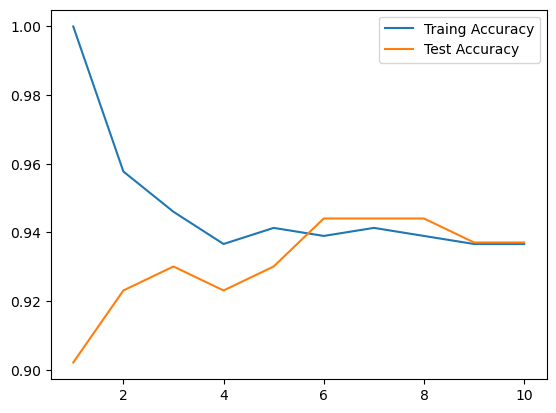

In [97]:
%matplotlib inline

import matplotlib.pyplot as plt     # pyplot 패키지 로딩
train_accuracy = []                  # 결과를 받는 빈 리스트
test_accuracy = []
n_neighbors_settings = range(1, 11)  # 1~10까지 변경

for n_neighbors in n_neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)    # 객체 생성
    clf.fit(X_train, y_train)                              # 모델 훈련
    train_accuracy.append(clf.score(X_train, y_train))     # 훈련 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))        # 테스트 정확도 저장
    
plt.plot(n_neighbors_settings, train_accuracy, label="Traing Accuracy") # 훈련 정확도
plt.plot(n_neighbors_settings, test_accuracy, label="Test Accuracy")    # 테스트 정확도
plt.legend()                                                            # 범주
plt.show()